# 支持向量机

## 线性支持向量机分类

In [96]:
# 在鸢尾花数据集上训练线性SVM

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.int)

In [97]:
# 对特征值进行标准化

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("scale", StandardScaler()),
    ("linear_svc", LinearSVC(loss="hinge", C=1))
])
svm_clf.fit(X, y)

# 预测
svm_clf.predict([[4.8, 1.7]])

array([1])

## 非线性支持向量机分类

### 卫星数据集上的分类

data shape:  (100, 2) (100,)


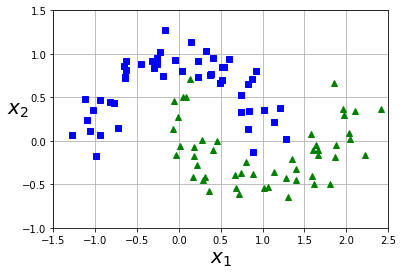

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

# 查看数据集
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42) # make_moon可以随机生成聚类和分类算法的数据集

print("data shape: ", X.shape, y.shape)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # bs blue square
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # g^ green trigle
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20) # label支持latex表达式
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [99]:
# 从图像上看数据是非线性可分的, 尝试将特征转换成高阶多项式, 变成线性可分

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("svm", LinearSVC(C=10, loss="hinge"))   # C越大, 分类间隔越小
])

poly_svm_clf.fit(X, y)

poly_svm_clf.predict([[1,1]])
poly_svm_clf.decision_function([[0.2,0.6]])

/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.00304268])

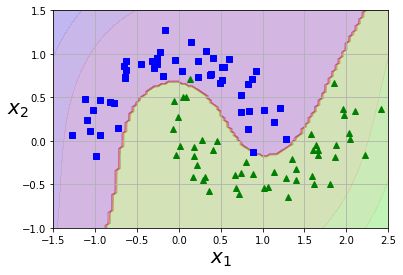

In [100]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) # x0轴范围内生成固定间隔的100个点
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) # x0 与 x1 两两配对生成(网格)坐标矩阵
    X = np.c_[x0.ravel(), x1.ravel()] # flatten以后再组合成 N*2维矩阵, N是样本个数100, 2是两个特征值
    y_pred = clf.predict(X).reshape(x0.shape) # 预测出来的值转成 网格的形状
    y_decision = clf.decision_function(X).reshape(x0.shape) # 决策分数转成网格形状, 决策分数>=1为正例
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### 使用多项式核

In [101]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly_kernel10_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly_kernel10_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

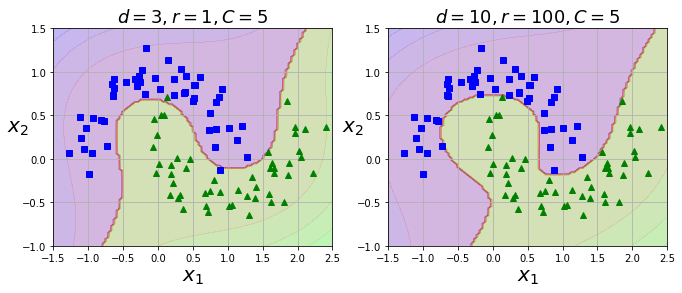

In [102]:
plt.figure(figsize=(11, 4))

plt.subplot(121) # 121 - 1行2列图像网格中的第1个
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122) # 121 - 1行2列图像网格中的第2个
plot_predictions(poly_kernel10_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

## 习题

### 习题8
在一个线性可分的数据集训练一个   LinearSVC ,并在同一个数据集上训练一个   SVC 和   SGDClassifier ,看它们是否产生了大致相同效果的模型。

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) # 返回一个True/False列表

X = X[setosa_or_versicolor] # 选取只为True的元素
y = y[setosa_or_versicolor]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5 # 惩罚参数, 软间隔支持向量机里对异常值的容忍度, 越大容忍度越低
alpha = 1 / (C * len(X)) # 正则化参数

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474272] [[1.05364736 1.09903308]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


[[-11.56182566   6.03129735]
 [ 17.28382566  -4.75067454]]


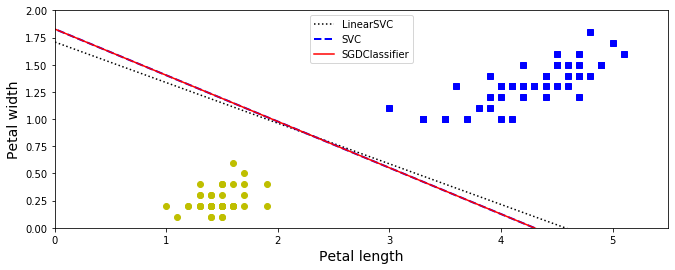

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# ??????
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# ?????

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=10)
plt.axis([0, 5.5, 0, 2])

plt.show()

### 习题9
在 MNIST 数据集上训练一个 SVM 分类器。因为 SVM 分类器是二元的分类,你需要使用一对多(one-versus-all)来对 10 个数字进行分类。你可能需要使用小的验证集来调整超参数,以加快进程。最后你能达到多少准确度?

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 引入MNIST数据集
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", data_home="./datasets")
X, y = mnist["data"], mnist["target"]

# X的shape是(70000, 784), 意味着它有784个特征, 特征数多比较适合用核技巧

# 准备训练集和测试集
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000].astype("int"), y[60000:].astype("int") # label转为数字方便后面的处理

# 将原数据打乱防止算法对顺序敏感, 做交叉验证的时候每一折含有的数字随机, 不会有缺漏
import numpy as np
shuffle_indices = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_indices], y_train[shuffle_indices]

/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {}
# ]

from sklearn.svm import LinearSVC

C = 5

svm_clf = LinearSVC(loss="hinge", C=C)

svm_clf.fit(X_train, y_train)

svm clf:  [-4.1581726  -8.42928735 -2.35580649 -2.82632239 -4.35975481 -2.78371382
 -3.81447152 -5.11337717 -2.14721865 -3.74796159] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.9030833333333333

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_clf = SVC(kernel="rbf", decision_function_shape="ovr", gamma="auto", random_state=42)

svc_clf.fit(X_train[:10000], y_train[:10000])

y_pred = svc_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.94835

### 习题10
在加利福尼亚住宅(California housing)数据集上训练一个 SVM 回归模型

In [22]:
# 加载数据集
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]
print(housing.DESCR)

# 划分训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 测试集占20%

# 特征缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [23]:
# 使用线性支持向量机回归模型
from sklearn.svm import LinearSVR
import numpy as np

lin_svr = LinearSVR(random_state=42) # LinearSVR使用线性核
lin_svr.fit(X_train_scaled, y_train)

# 回归模型使用均方根误差评估预测结果
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)

mse = mean_squared_error(y_train, y_pred)

print("linear SVM mse: ", mse)
print("linear SVM rmse: ", np.sqrt(mse))

linear SVM mse:  0.9499688222172289
linear SVM rmse:  0.9746634404845751


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


均方误差反应的是预测的平均偏差, target的房价单位是万美元, 以为着预测的平均误差接近1万美元, 效果不算特别好

In [24]:
# 使用随机搜索加上交叉验证来调整超参数

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

# SVR默认使用rbf高斯核, 有几个超参数
param_distributions = {
    "gamma": reciprocal(0.001, 0.1), # gamma 是高斯径向基函数的常数参数
    "C": uniform(1, 10)
}

rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)

rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   7.2s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   7.2s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   7.3s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   6.9s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   6.8s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   6.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   6.5s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   6.5s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc4a6a14f60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc4a6805ef0>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [25]:
best_model = rnd_search_cv.best_estimator_

# 回归模型使用均方根误差评估预测结果
from sklearn.metrics import mean_squared_error

y_pred = best_model.predict(X_train_scaled)

mse = mean_squared_error(y_train, y_pred)

print("linear SVM mse: ", mse)
print("linear SVM rmse: ", np.sqrt(mse))

linear SVM mse:  0.32804539999959814
linear SVM rmse:  0.5727524770785354


In [26]:
# 测试集上试验模型
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print("linear SVM mse: ", mse)
print("linear SVM rmse: ", np.sqrt(mse))

linear SVM mse:  0.3515503774395342
linear SVM rmse:  0.5929168385528735
